# Running and Inspecting Experiments
This notebook was used to run experiments by manually inspecting and changing different ideas and configuration, to fast compare results, without the need of executing long `GridSearch` analysis of hyperparameters. However, in `Modelling.ipynb` the final hyper-parameter optimization is being done with `GridSearch`.
***

# Installing Packages and Libraries

In [1]:
# Uncomment to upgrade packages
#!pip3 install pandas --user --upgrade --quiet
#!pip3 install scipy --user --upgrade --quiet
#!pip3 install numpy --user --upgrade --quiet
#!pip3 install statsmodels --user --upgrade --quiet
#!pip3 install seaborn --user --upgrade --quiet

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# extra imports
from pandas import read_csv
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import svm

In [5]:
np.random.seed(666)

***
# SECTION 1: Reading the Dataset `bank_marketing_new.csv`

In this first part we are going to load the dataset and get a first overview of the available data.

In [6]:
bank_marketing = read_csv("./bank_marketing_new.csv", header=0, delimiter=',')
bank_marketing.head(20)

,age,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,y,job,job2,log_campaign,log_previous
0,28,single,2,no,2528,yes,no,cellular,18,may,8,0,no,others,others,2.197225,0.000000
1,35,single,3,no,51,no,no,cellular,18,aug,5,0,no,business,business,1.791759,0.000000
2,48,single,2,no,469,no,yes,cellular,9,jul,1,0,no,others,others,0.693147,0.000000
3,51,married,3,no,1315,no,no,telephone,5,jun,2,0,no,others,others,1.098612,0.000000
4,36,single,3,no,688,no,no,cellular,2,jun,1,1,no,business,business,0.693147,0.693147
5,41,married,3,no,23,no,no,cellular,22,aug,2,0,no,business,business,1.098612,0.000000
6,30,single,2,no,248,yes,no,cellular,13,may,1,0,no,others,others,0.693147,0.000000
7,32,divorced,2,no,8,yes,no,cellular,16,jul,1,0,no,others,others,0.693147,0.000000
8,41,married,1,no,574,yes,no,Unknown,14,may,2,0,no,others,others,1.098612,0.000000
9,47,married,1,no,1056,no,no,telephone,29,aug,2,0,no,others,others,1.098612,0.000000


In [7]:
bank_marketing.drop(columns=['job2', 'log_campaign', 'log_previous'], inplace=True)

In [8]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43611 entries, 0 to 43610
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43611 non-null  int64 
 1   marital    43611 non-null  object
 2   education  43611 non-null  int64 
 3   default    43611 non-null  object
 4   balance    43611 non-null  int64 
 5   housing    43611 non-null  object
 6   loan       43611 non-null  object
 7   contact    43611 non-null  object
 8   day        43611 non-null  int64 
 9   month      43611 non-null  object
 10  campaign   43611 non-null  int64 
 11  previous   43611 non-null  int64 
 12  y          43611 non-null  object
 13  job        43611 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.7+ MB


In [9]:
bank_marketing.describe(include='all')

,age,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,y,job
count,43611.000000,43611,43611.000000,43611,43611.000000,43611,43611,43611,43611.000000,43611,43611.000000,43611.000000,43611,43611
unique,NaN,3,NaN,2,NaN,2,2,3,NaN,12,NaN,NaN,2,2
top,NaN,married,NaN,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no,others
freq,NaN,26230,NaN,42837,NaN,24288,36667,28344,NaN,13481,NaN,NaN,38400,27995
mean,40.943134,NaN,2.147371,NaN,1351.438697,NaN,NaN,NaN,15.624086,NaN,2.333586,0.528857,NaN,NaN
std,10.645034,NaN,0.664455,NaN,2828.449413,NaN,NaN,NaN,8.268368,NaN,1.672847,1.499892,NaN,NaN
min,18.000000,NaN,1.000000,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,2.000000,NaN,75.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,2.000000,NaN,453.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,0.000000,NaN,NaN
75%,48.000000,NaN,3.000000,NaN,1433.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,0.000000,NaN,NaN


***
# SECTION 2: Preprocessing of Categorical Variables

In [10]:
#Boolean yes,no to 1,0
yes_no_mapping = {'yes':1, 'no': 0}
bank_marketing['default'] = bank_marketing['default'].map(yes_no_mapping)
bank_marketing['housing'] = bank_marketing['housing'].map(yes_no_mapping)
bank_marketing['loan'] = bank_marketing['loan'].map(yes_no_mapping)
bank_marketing['y'] = bank_marketing['y'].map(yes_no_mapping)

yes_no_mapping = {'business':1, 'others': 0}
bank_marketing['job'] = bank_marketing['job'].map(yes_no_mapping)

In [11]:
bank_marketing.head(10)

,age,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,y,job
0,28,single,2,0,2528,1,0,cellular,18,may,8,0,0,0
1,35,single,3,0,51,0,0,cellular,18,aug,5,0,0,1
2,48,single,2,0,469,0,1,cellular,9,jul,1,0,0,0
3,51,married,3,0,1315,0,0,telephone,5,jun,2,0,0,0
4,36,single,3,0,688,0,0,cellular,2,jun,1,1,0,1
5,41,married,3,0,23,0,0,cellular,22,aug,2,0,0,1
6,30,single,2,0,248,1,0,cellular,13,may,1,0,0,0
7,32,divorced,2,0,8,1,0,cellular,16,jul,1,0,0,0
8,41,married,1,0,574,1,0,Unknown,14,may,2,0,0,0
9,47,married,1,0,1056,0,0,telephone,29,aug,2,0,0,0


In [12]:
#One_hot_encoding multicategorical
X = bank_marketing
categorical_columns =X.dtypes[X.dtypes == 'object'].index.values
for column in categorical_columns:
    X_one_hot = pd.get_dummies(X[column], prefix=column)
    X_one_hot = X_one_hot.astype(int)  # Convert True/False to 1/0
    X = pd.concat([X, X_one_hot], axis=1)  # Concatenate the one-hot encoded columns to the original DataFrame
    X = X.drop(columns=[column])  # Drop the original categorical column

bank_marketing = X
bank_marketing.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'campaign', 'previous', 'y', 'job', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_Unknown',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

***
# SECTION 3: Dataset Splits

## Resampling Protocol
In order to start the modeling process it is very important to split the dataset into training and test sets.

We will use two data partitions (`train` and `test`) and later on we will apply cross-validation over the train partition for deciding hyperparameters.

In [13]:
X = bank_marketing.loc[:, bank_marketing.columns != 'y']
y = bank_marketing['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43611, 28)
(34888, 28)
(8723, 28)
(34888,)
(8723,)


In [15]:
y_train.value_counts()

y
0    30750
1     4138
Name: count, dtype: int64

***
# SECTION 4: Modeling

## Setting-up functions

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3));
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False);

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # Calculate the F1 score for each class and the overall weighted average
    f1_scores = f1_score(y_test, y_pred, average=None)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the F1 scores for each class
    print("F1 Scores (Per Class):")
    for idx, f1 in enumerate(f1_scores):
        print(f"Class {idx}: {f1}")

    # Print the overall weighted F1 score
    print("Weighted F1 Score:", weighted_f1)

## Undersampling

In [17]:
def undersample (X,y):
    majority_indices_train = y[y == 0].index
    minority_indices_train = y[y == 1].index

    undersampled_majority_indices_train = resample(majority_indices_train,
                                             replace=False,
                                             n_samples=sum(y == 1),
                                             random_state=42)

    # Concatenate undersampled majority indices with minority indices
    undersampled_indices_train = pd.Index(undersampled_majority_indices_train).union(minority_indices_train)

    # Use the undersampled indices to create undersampled datasets
    X_undersampled = X.loc[undersampled_indices_train]
    y_undersampled = y.loc[undersampled_indices_train]
    
    print(X_undersampled.shape, '\n',y_undersampled.value_counts())
    return X_undersampled, y_undersampled

In [18]:
X_train, y_train = undersample(X_train, y_train)
X_undersampled_test, y_undersampled_test = undersample(X_test, y_test)

(8276, 28) 
 y
0    4138
1    4138
Name: count, dtype: int64
(2146, 28) 
 y
0    1073
1    1073
Name: count, dtype: int64


## Oversampling

In [19]:
# Apply Random Oversampling to balance the dataset
# oversampler = RandomOverSampler()
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

## Shapes

In [20]:
X_test.shape

(8723, 28)

In [21]:
y_test.shape

(8723,)

In [22]:
y_test.value_counts()

y
0    7650
1    1073
Name: count, dtype: int64

In [23]:
X_train.shape

(8276, 28)

In [24]:
y_train.shape

(8276,)

In [25]:
y_undersampled_test.value_counts()

y
0    1073
1    1073
Name: count, dtype: int64

## Normalization

In [26]:
def minmaxscaling(X, y, scaler=None):
    # Scale numerical variables
    if scaler is None: 
        scaler = StandardScaler()
        # scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    else:
        X = scaler.transform(X)
    
    return X, y, scaler

X_train, y_train, scaler = minmaxscaling(X_train, y_train)
X_test, y_test, _ = minmaxscaling(X_test, y_test, scaler)

## Different Modelling Tries

### Linear SVC

In [27]:
import time
start_time = time.time()

# Primal, n_features < n_samples
model = svm.LinearSVC(dual=False).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

0.015136957168579102

In [28]:
y_train.value_counts()

y
0    4138
1    4138
Name: count, dtype: int64

Model Accuracy: 0.71
Confusion Matrix:
[[5474 2176]
 [ 364  709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      7650
           1       0.25      0.66      0.36      1073

    accuracy                           0.71      8723
   macro avg       0.59      0.69      0.58      8723
weighted avg       0.85      0.71      0.76      8723

F1 Scores (Per Class):
Class 0: 0.8116844602609727
Class 1: 0.3582617483577564
Weighted F1 Score: 0.7559097761073386


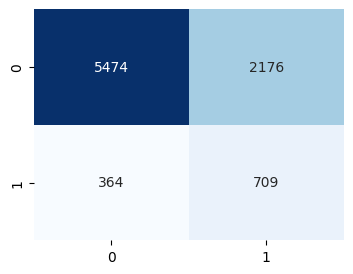

In [29]:
evaluate_model(model, X_test, y_test)

In [30]:
##not good for yes instances, NEXT DO UNDERSAMPLING AND SEE

### Kernelized SVC: Gaussian Radial Basis

In [31]:
import time
start_time = time.time()


kernel = "rbf"
sigma = "scale"
model = svm.SVC(kernel=kernel, gamma=sigma, class_weight='balanced').fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

1.8318381309509277

Model Accuracy: 0.81
Confusion Matrix:
[[6430 1220]
 [ 431  642]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7650
           1       0.34      0.60      0.44      1073

    accuracy                           0.81      8723
   macro avg       0.64      0.72      0.66      8723
weighted avg       0.86      0.81      0.83      8723

F1 Scores (Per Class):
Class 0: 0.8862242436772104
Class 1: 0.4374787052810903
Weighted F1 Score: 0.8310248899343424


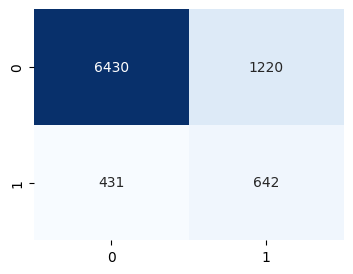

In [32]:
evaluate_model(model, X_test, y_test)

As we can see, neither the Linear or Kernelized SVC achieve a better `accuracy` than a dummy model always predicting "no", given we have 87% of "no", and only improves the overall `f1-score` by getting a small amount of "yes" right and maintaining 88% accuracy. Nonetheless, a 6% of recall on the "yes" is still very poor.

We decided to try undersampling the amount of "no" instances in our training set and retry our SVM trainings.

### Kernelized SVC with Sigmoid Kernel

In [33]:
import time
start_time = time.time()


kernel = "sigmoid"
sigma = "scale"
model = svm.SVC(kernel=kernel, gamma=sigma).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

2.286609649658203

Model Accuracy: 0.56
Confusion Matrix:
[[4250 3400]
 [ 461  612]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69      7650
           1       0.15      0.57      0.24      1073

    accuracy                           0.56      8723
   macro avg       0.53      0.56      0.46      8723
weighted avg       0.81      0.56      0.63      8723

F1 Scores (Per Class):
Class 0: 0.6876466305315103
Class 1: 0.24070796460176994
Weighted F1 Score: 0.6326695368088677


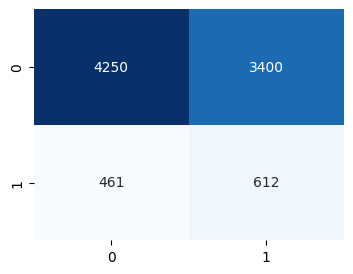

In [34]:
evaluate_model(model, X_test, y_test)

### Random Forest

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

Model Accuracy: 0.78
Confusion Matrix:
[[6147 1503]
 [ 374  699]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7650
           1       0.32      0.65      0.43      1073

    accuracy                           0.78      8723
   macro avg       0.63      0.73      0.65      8723
weighted avg       0.87      0.78      0.81      8723

F1 Scores (Per Class):
Class 0: 0.8675463975725073
Class 1: 0.4268702290076336
Weighted F1 Score: 0.8133396419987242


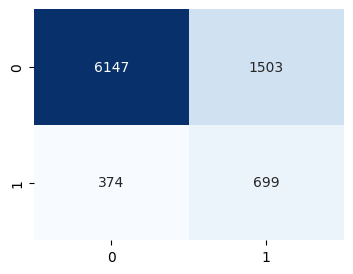

In [35]:
# Create a Random Forest model with specified parameters
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

evaluate_model(rf_model, X_test, y_test)

### Logistic Regression

LogisticRegression()

Model Accuracy: 0.71
Confusion Matrix:
[[5479 2171]
 [ 366  707]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      7650
           1       0.25      0.66      0.36      1073

    accuracy                           0.71      8723
   macro avg       0.59      0.69      0.58      8723
weighted avg       0.85      0.71      0.76      8723

F1 Scores (Per Class):
Class 0: 0.8120044460911449
Class 1: 0.3578840799797519
Weighted F1 Score: 0.7561439447914172


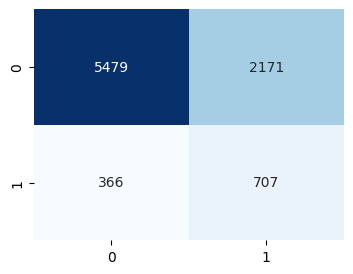

In [36]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(model, X_test, y_test)

### Gradient Boost

GradientBoostingClassifier(random_state=42)

Model Accuracy: 0.79
Confusion Matrix:
[[6191 1459]
 [ 365  708]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7650
           1       0.33      0.66      0.44      1073

    accuracy                           0.79      8723
   macro avg       0.64      0.73      0.65      8723
weighted avg       0.87      0.79      0.82      8723

F1 Scores (Per Class):
Class 0: 0.8716035477967056
Class 1: 0.43703703703703706
Weighted F1 Score: 0.8181483298619212


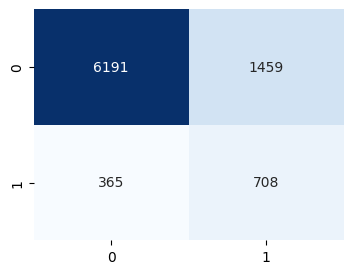

In [37]:
# Create a Gradient Boosting model with default parameters
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(gb_model, X_test, y_test)

### kNN

KNeighborsClassifier(n_neighbors=7)

Model Accuracy: 0.73
Confusion Matrix:
[[5742 1908]
 [ 420  653]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      7650
           1       0.25      0.61      0.36      1073

    accuracy                           0.73      8723
   macro avg       0.59      0.68      0.60      8723
weighted avg       0.85      0.73      0.77      8723

F1 Scores (Per Class):
Class 0: 0.8314509122502172
Class 1: 0.35938359933957076
Weighted F1 Score: 0.7733827904167742


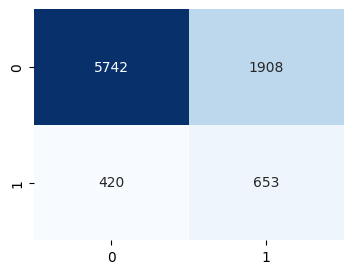

In [38]:
# Create a k-Nearest Neighbors model with k=3
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(knn_model, X_test, y_test)

### Kernelized SVC with Polynomial Kernel

Pipeline(steps=[('svm_clf', SVC(C=5, coef0=1, degree=2, kernel='poly'))])

Model Accuracy: 0.82
Confusion Matrix:
[[6511 1139]
 [ 446  627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7650
           1       0.36      0.58      0.44      1073

    accuracy                           0.82      8723
   macro avg       0.65      0.72      0.67      8723
weighted avg       0.86      0.82      0.84      8723

F1 Scores (Per Class):
Class 0: 0.8914903813240227
Class 1: 0.441704825642832
Weighted F1 Score: 0.8361630969899727


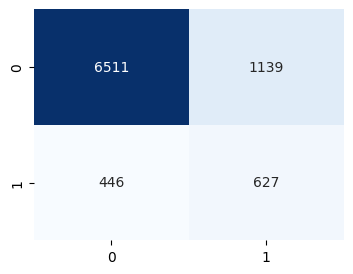

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svm_clf = Pipeline([
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])

# Fit the pipeline on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(svm_clf, X_test, y_test)

### Bayes Classifier

From theory, the best model for `binary classification` is the bayes classifier using the `0-1 loss` we will go into it step by step.

Pipeline(steps=[('classifier', GaussianNB())])

Model Accuracy: 0.81
Confusion Matrix:
[[6655  995]
 [ 639  434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7650
           1       0.30      0.40      0.35      1073

    accuracy                           0.81      8723
   macro avg       0.61      0.64      0.62      8723
weighted avg       0.84      0.81      0.82      8723

F1 Scores (Per Class):
Class 0: 0.8906584582441114
Class 1: 0.3469224620303757
Weighted F1 Score: 0.8237745050241941


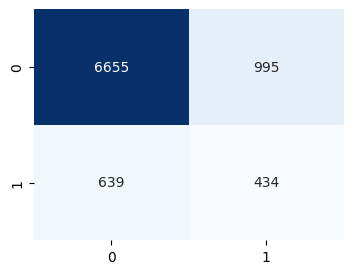

In [40]:
from sklearn.naive_bayes import GaussianNB
# Create a pipeline with the Gaussian Naive Bayes classifier
model = Pipeline(steps=[('classifier', GaussianNB())])

# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(model, X_test, y_test)

***
# SECTION 5: Bias-Variance Tradeoff

This concept is of great interest as it is correlated with the concept of overfitting and underfitting meaning that a model with high variance will have a low bias and this is that the model is overfitting the data used for train while on the other hand if a model has high bias and low variance then the model is underfitting. Also, remember that a model with high capacity (complexity) is more prone to overfit compared with those that have lower capacity.

Given a dataset $D = \{(\mathbf{x}_1,y_1), \dots, (\mathbf{x}_n, y_n)\}$ with $\mathbf{x}_i\in\mathbb{R}^d$ and $y_i\in \{'\text{yes}', '\text{no}'\}$ with $X = \begin{pmatrix} \rule[.5ex]{2em}{0.3pt} &  \mathbf{x}_1^T & \rule[.5ex]{2em}{0.3pt}\\ & \vdots & \\ \rule[.5ex]{2em}{0.3pt} & \mathbf{x}_n^T & \rule[.5ex]{2em}{0.3pt} \end{pmatrix}$ and $\mathbf{y} = \begin{pmatrix} y_1 \\ \vdots \\ y_n\end{pmatrix}$.

The bias and variance formula is: $$\mathbb{E}_{D,\epsilon}[(y - \hat{f}(x;D))^2] = \text{Bias}_D[\hat{f}(x;D)]^2 + \text{Var}_D[\hat{f}(x;D)]+\sigma^2$$

where:
$$\text{Bias}_D[\hat{f}(x;D)]=\mathbb{E}_D[\hat{f}(x;D)-f(x)]=\mathbb{E}_D[\hat{f}(x;D)]-\mathbb{E}_{y|x}[y(x)]$$
$$\text{Var}_D[\hat{f}(x;D)]=\mathbb{E}_D[(\mathbb{E}_D[\hat{f}(x;D)]-\hat{f}(x;D))^2]$$
$$\sigma^2=\mathbb{E}_y[(y-f(x))^2]$$

Bias is the difference between the average estimator from different training samples and the true value. The variance provides an estimate of how much the estimate varies as we vary the training data. $\sigma^2$ is the irreducible error.